# Intro to Convolutions

## Set up

In [1]:
!pip install scipy

In [3]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
# from scipy.ndimage import imread
from imageio import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [4]:
def plots(ims, interp=False, titles=None):
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):
    f = plt.figure(figsize=(3,6), frameon=True)
    # plt.show(im)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

## MNIST Data

In [5]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
images_train = X_train
labels_train = y_train
images_test = X_test
labels_test = y_test

In [7]:
print(images_train.shape)
print(labels_train.shape)
print(images_test.shape)
print(labels_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
# from tensorflow.keras.datasets import mnist
# images,labels = mnist.load_data()


In [9]:
images=images_train
labels=labels_train.astype(int)


In [10]:
n=len(labels)
images.shape, labels.shape

((60000, 28, 28), (60000,))

In [11]:
images[0].shape

(28, 28)

In [12]:
# mnist.keys()

In [13]:
# mnist['data'].shape, mnist['target'].shape

In [14]:
# images = np.reshape(mnist['data'], (70000, 28, 28))
# labels = mnist['target'].astype(int)
# n=len(images)
# images.shape, labels.shape

In [15]:
images_flip = images
images = images/255

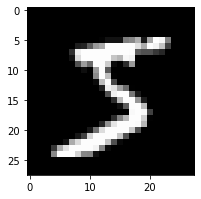

In [16]:
plot(images[0])

In [17]:
labels[0]

5

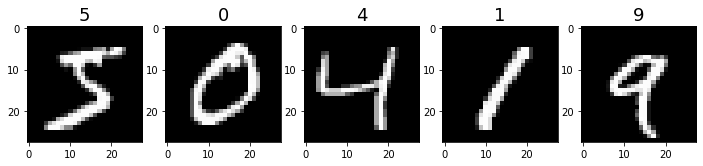

In [18]:
plots(images[:5], titles=labels[:5])

we can zoom in on part of the image

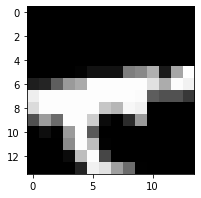

In [19]:
plot(images[0,0:14, 8:22])

## Edge Detection

We will look at how to create an Edge detector:

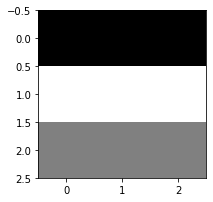

In [20]:
top=[[-1,-1,-1],
     [ 1, 1, 1],
     [ 0, 0, 0]]

plot(top)

In [21]:
#Added from fasta2020 course notebook
r=(0,28)
def zoomim(x1=0,x2=28,y1=0,y2=28):
    plot(images[0,y1:y2,x1:x2])
w=interactive(zoomim, x1=r,x2=r,y1=r,y2=r)
w

interactive(children=(IntSlider(value=0, description='x1', max=28), IntSlider(value=28, description='x2', max=…

In [22]:
dims = np.index_exp[10:28:1,3:13]
images[0][dims]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0549, 0.0039, 0.6039, 0.9922],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.5451, 0.9922],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0431, 0.7451],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1373],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1529],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0941, 0.4471, 0.8667],
       [0.    , 0.   

In [23]:
corrtop = correlate(images[0], top)

In [24]:
corrtop[dims]

array([[ 0.    ,  0.    ,  0.    ,  0.    , -0.3137, -0.8706, -1.2863, -1.3608, -0.8039, -0.8392],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.0549, -0.0588, -0.1176, -0.0627,  0.3333],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.502 , -0.749 , -0.502 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.0431, -0.651 , -0.698 ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.1373, -0.7647],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    , -0.3176],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.1529,  0.7333],
       [ 0

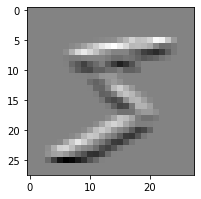

In [25]:
plot(corrtop)

In [26]:
np.rot90(top, 1)

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

True

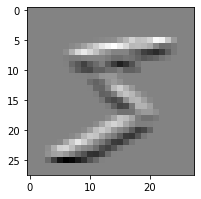

In [27]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop)

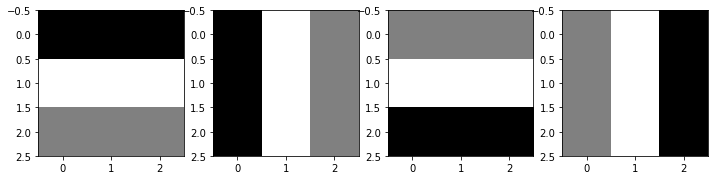

In [28]:
straights=[np.rot90(top,i) for i in range(4)]
plots(straights)

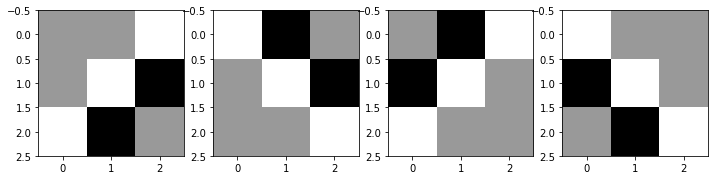

In [29]:
br=[[ 0, 0, 1],
    [ 0, 1,-1.5],
    [ 1,-1.5, 0]]

diags = [np.rot90(br,i) for i in range(4)]
plots(diags)

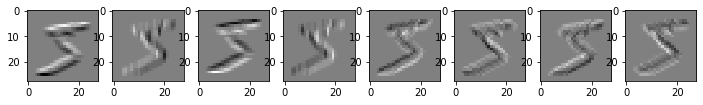

In [30]:
rots = straights + diags
corrs = [correlate(images[0], rot) for rot in rots]
plots(corrs)

In [31]:
eights=[images[i] for i in range(n) if labels[i]==8]
ones=[images[i] for i in range(n) if labels[i]==1]

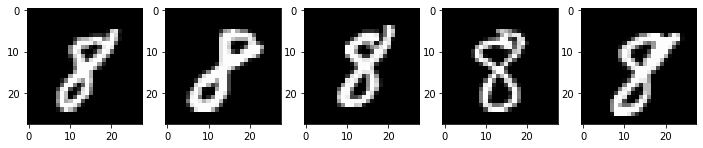

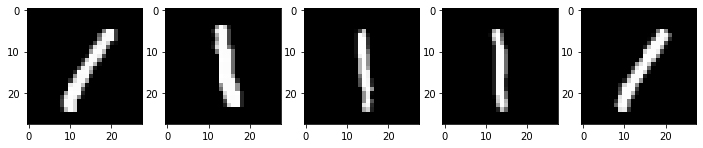

In [32]:
plots(eights[:5])
plots(ones[:5])

In [33]:
def normalize(arr): return (arr-arr.mean())/arr.std()

In [34]:
filts8 = np.array([ims.mean(axis=0) for ims in pool8])
filts8 = normalize(filts8)

NameError: ignored

In [94]:
plots(filts8)

NameError: ignored

In [ ]:
pool1 = [np.array([pool(correlate(im, rot)) for im in ones]) for rot in rots]
filts1 = np.array([ims.mean(axis=0) for ims in pool1])
filts1 = normalize(filts1)

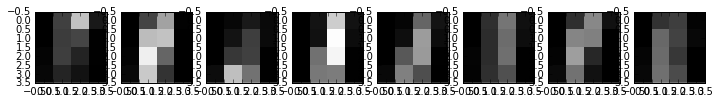

In [ ]:
plots(filts1)

In [ ]:
def pool_corr(im): return np.array([pool(correlate(im, rot)) for rot in rots])

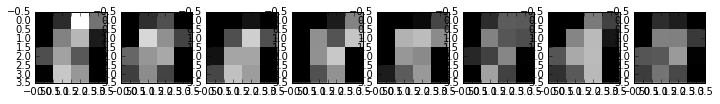

In [ ]:
plots(pool_corr(eights[0]))

In [ ]:
def sse(a,b): return ((a-b)**2).sum()
def is8_n2(im): return 1 if sse(pool_corr(im),filts1) > sse(pool_corr(im),filts8) else 0

In [ ]:
sse(pool_corr(eights[0]), filts8), sse(pool_corr(eights[0]), filts1)

(126.77776, 181.26105)

In [ ]:
[np.array([is8_n2(im) for im in ims]).sum() for ims in [eights,ones]]

[5223, 287]

In [ ]:
[np.array([(1-is8_n2(im)) for im in ims]).sum() for ims in [eights,ones]]

[166, 5892]

In [ ]:
def n1(a,b): return (np.fabs(a-b)).sum()
def is8_n1(im): return 1 if n1(pool_corr(im),filts1) > n1(pool_corr(im),filts8) else 0

In [ ]:
[np.array([is8_n1(im) for im in ims]).sum() for ims in [eights,ones]]

In [ ]:
[np.array([(1-is8_n1(im)) for im in ims]).sum() for ims in [eights,ones]]